<a href="https://colab.research.google.com/github/changliu17/dsfigures/blob/master/word2vec0703.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

## Create by Chang Liu
## cliu17 [at] bu.edu

##  Packages: numpy, matplotlib, pandas, scikit-learn, genism
##  Files needed can be download at https://nlp.stanford.edu/projects/glove/
##  Reference： https://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as axisartist
import pandas as pd
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec


In [ ]:
# Import file and train model
# Files can be download at https://nlp.stanford.edu/projects/glove/
glove_file = 'glove.6B.100d.txt'  # Pre-trained word vectors 
word2vec_glove_file = 'glove.6B.100d.word2vec.txt'
glove2word2vec(glove_file, word2vec_glove_file)


In [ ]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [ ]:
# define analogy   
def analogy(x1, y1, x2):
    result = model.most_similar(negative=[x1], 
                                positive=[y1, x2])
    return result[0][0]

# apply analogy to find capital cities in different countries
countries = ['india', 'china', 'nigeria', 'brazil']
cities = [analogy('italy', 'rome', country) for country in countries]
label = countries + cities
data = [model[w] for w in label]

# Apply pca to reduce the dimension of the data to 2
def dimension_reduction(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    return twodim
eg = dimension_reduction(model, countries+cities)
# print(eg)

In [55]:
# Create capitalized labeld for annotation
realcities = [c.capitalize() for c in cities]
realcountries = [c.capitalize() for c in countries]
reallabel = realcountries + realcities
# print(reallabel)

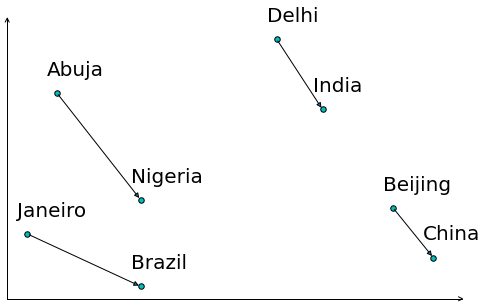

In [56]:
# Visualization
fig = plt.figure(figsize=(8,5))
ax = axisartist.Subplot(fig, 111)

# Axis setting
fig.add_axes(ax)
ax.axis['right'].set_visible(False)  # clear right and top frame
ax.axis['top'].set_visible(False)
ax.axis['left'].set_axisline_style('->')  # draw an arrow for y-axis
ax.axis['bottom'].set_axisline_style('->') 
ax.set_xticks([]) # Do not show ticks
ax.set_yticks([])

plt.scatter(eg[:,0], eg[:,1 ], s=30, edgecolors='k', c='c')

# Annotation
# Annotate labels
for i in range(0,8):
        plt.annotate(
            reallabel[i],
            xy = eg[i],
            xytext=(-10, 18), 
            textcoords='offset points',
            fontsize=20)   

# Draw arrows to show the relationship
for i in range(len(eg)//2):
    plt.annotate("",
            xy=eg[i],
            xytext=eg[i+len(data)//2],
            arrowprops=dict(arrowstyle="-|>",
                                connectionstyle="arc3"))
    
plt.show()